# **NSL_KDD Dataset Analysis**

# Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV, RFE
from sklearn.decomposition import PCA
from sklearn.ensemble import  RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import label_binarize
from sklearn import metrics
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [2]:
# Comprehensive Analysis of Stress Level Dataset for Machine Learning

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
# Custom color palettes - choose one or mix them
blue_palette = sns.color_palette("Blues_r", n_colors=8)
green_palette = sns.color_palette("Greens_r", n_colors=8)
orange_palette = sns.color_palette("Oranges_r", n_colors=8)
# Set a blue-green palette as default
sns.set_palette("viridis")

In [4]:


# =============================================================================
# 1. DATA LOADING AND INITIAL EXPLORATION
# =============================================================================

# Load the dataset
data1 = pd.read_csv('kdd_train.csv')
data2 = pd.read_csv('kdd_test.csv')

# Define target variable
target_col = 'labels'
X_train = data1.drop(columns=[target_col])
y_train = data1[target_col]

# Separate features and target for test
X_test = data2.drop(columns=[target_col])
y_test = data2[target_col]
print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"Dataset Shape: {data1.shape}")
print(f"Total Records: {data1.shape[0]}")
print(f"Total Features: {data1.shape[1]}")
print("\nColumn Names:")
print(data1.columns.tolist())

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(data1.head())

DATASET OVERVIEW
Dataset Shape: (125973, 42)
Total Records: 125973
Total Features: 42

Column Names:
['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'labels']

First 5 rows of the dataset:
   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491       

In [5]:
# =============================================================================
# 2. DATA QUALITY ASSESSMENT
# =============================================================================

print("\n" + "=" * 80)
print("DATA QUALITY ASSESSMENT")
print("=" * 80)

# Check data types
print("\nData Types:")
print(data1.dtypes)

# Check for missing values
print("\nMissing Values:")
missing_values = data1.isnull().sum()
if missing_values.sum() == 0:
    print("No missing values found in the dataset!")
else:
    print(missing_values[missing_values > 0])

# Check for duplicate rows
duplicates = data1.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Basic statistics
print("\nBasic Statistics:")
print(data1.describe())


DATA QUALITY ASSESSMENT

Data Types:
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate               


UNIVARIATE ANALYSIS


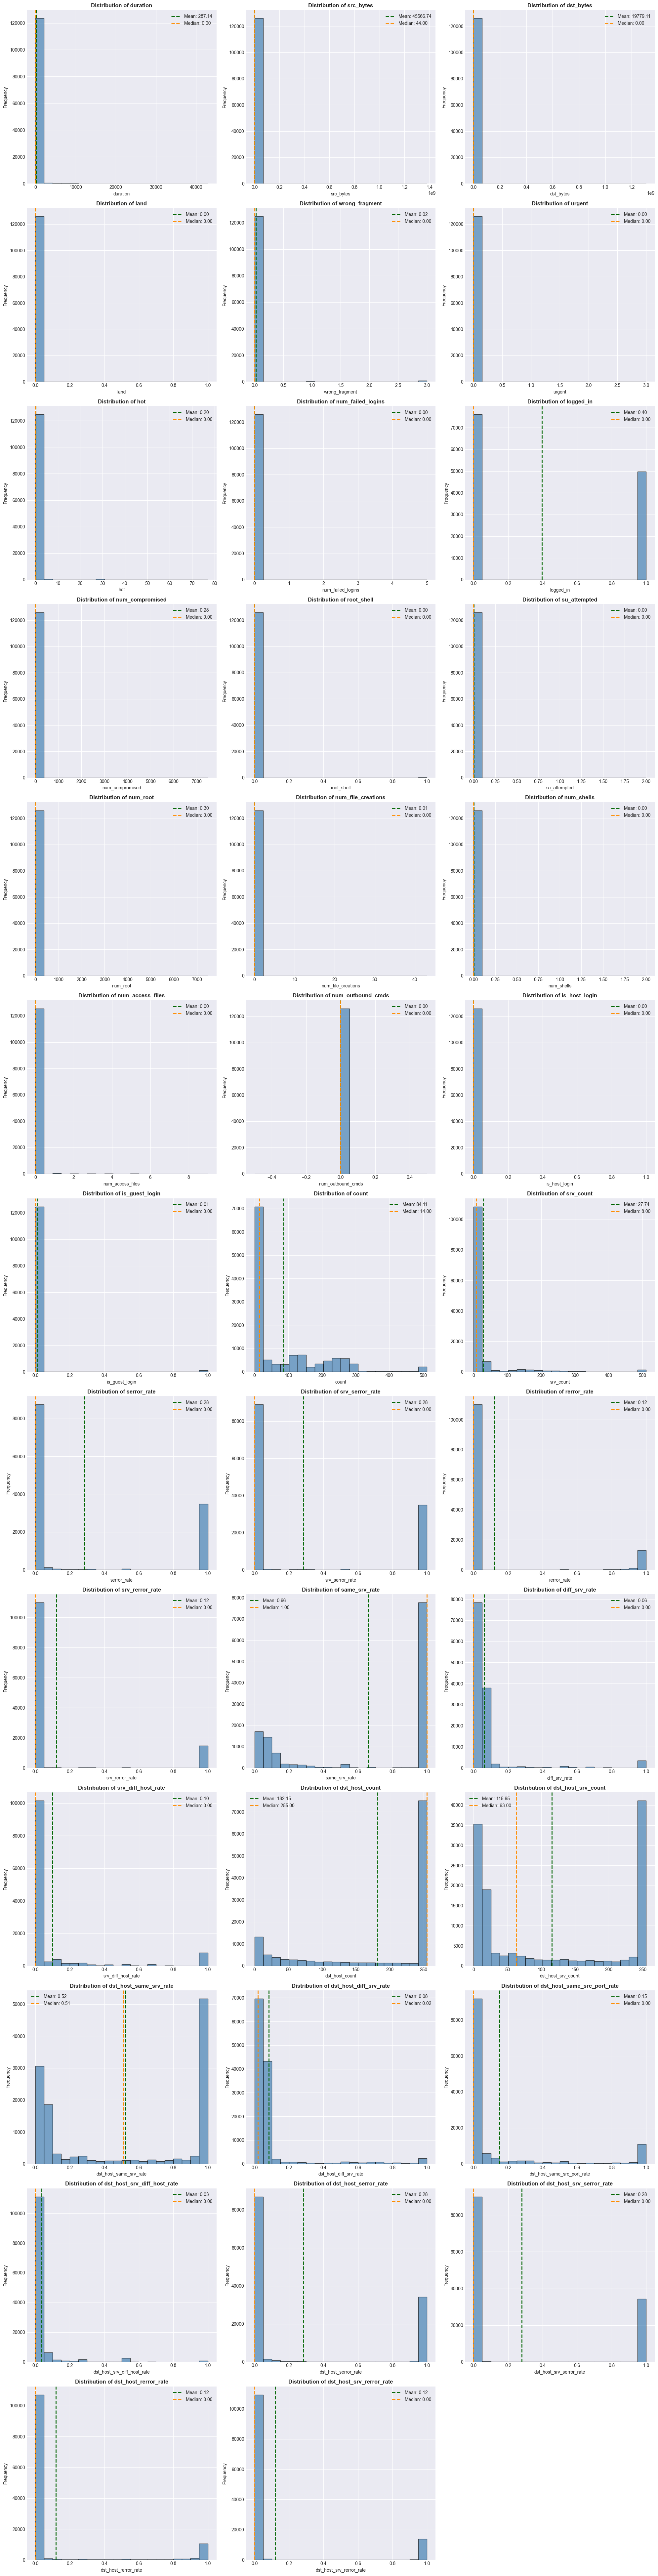

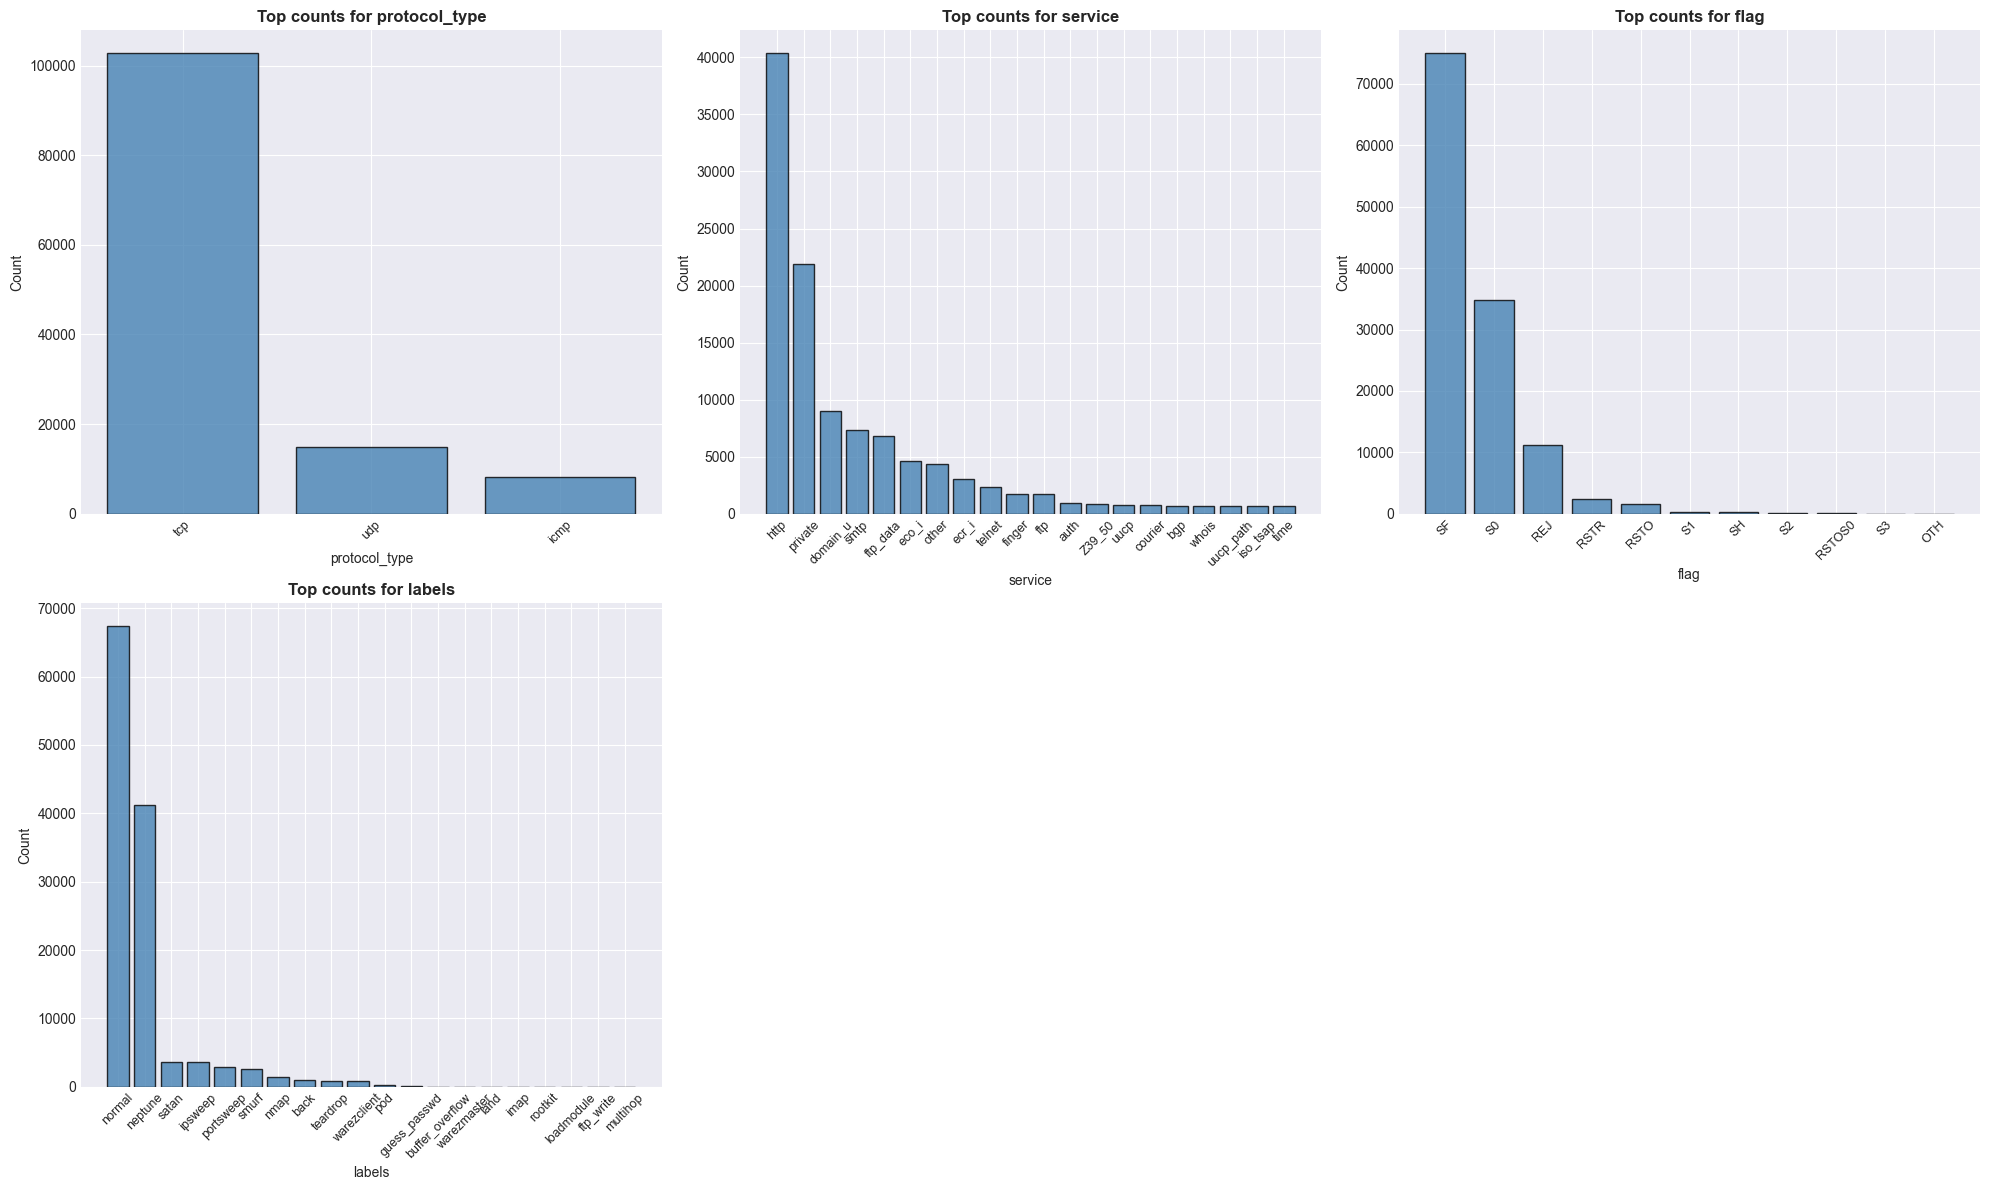


Skewness of numeric features:
is_host_login                  354.926753
dst_bytes                      290.052911
num_compromised                250.107883
num_root                       236.913724
src_bytes                      190.669347
urgent                         149.914509
land                            70.965063
num_shells                      59.592151
num_file_creations              55.665341
num_failed_logins               53.764424
num_access_files                45.554961
su_attempted                    42.435591
root_shell                      27.247411
hot                             12.589886
duration                        11.880230
wrong_fragment                  11.457988
is_guest_login                  10.155746
dst_host_srv_diff_host_rate      5.548174
srv_count                        4.694162
diff_srv_rate                    4.379815
dst_host_diff_srv_rate           3.609600
srv_diff_host_rate               2.860355
dst_host_rerror_rate             2.347446
dst

In [6]:
# =============================================================================
# 3. UNIVARIATE ANALYSIS - DISTRIBUTION OF FEATURES
# =============================================================================

print("\n" + "=" * 80)
print("UNIVARIATE ANALYSIS")
print("=" * 80)

# split columns by dtype
num_cols = data1.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in data1.columns if c not in num_cols]

# ---------- numeric features: hist with mean and median ----------
n = len(num_cols)
cols_per_row = 3
rows = ceil(n / cols_per_row) if n > 0 else 1
fig, axes = plt.subplots(rows, cols_per_row, figsize=(20, 6 * rows))
axes = np.array(axes).reshape(rows, cols_per_row)

for i, col in enumerate(num_cols):
    r, c = divmod(i, cols_per_row)
    ax = axes[r, c]
    x = pd.to_numeric(data1[col], errors="coerce").dropna()
    ax.hist(x, bins=20, edgecolor="black", alpha=0.7, color="steelblue")
    ax.set_title(f"Distribution of {col}", fontsize=12, fontweight="bold")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

    mean_val = x.mean()
    median_val = x.median()
    ax.axvline(mean_val, color="darkgreen", linestyle="--", linewidth=2, label=f"Mean: {mean_val:.2f}")
    ax.axvline(median_val, color="darkorange", linestyle="--", linewidth=2, label=f"Median: {median_val:.2f}")
    ax.legend()

# hide any empty subplots
for j in range(n, rows * cols_per_row):
    r, c = divmod(j, cols_per_row)
    fig.delaxes(axes[r, c])

plt.tight_layout()
plt.savefig("feature_distributions_numeric.png", dpi=300, bbox_inches="tight")
plt.show()

# ---------- categorical features: top counts bar chart ----------
if len(cat_cols) > 0:
    m = len(cat_cols)
    rows_c = ceil(m / cols_per_row)
    fig, axes_c = plt.subplots(rows_c, cols_per_row, figsize=(20, 6 * rows_c))
    axes_c = np.array(axes_c).reshape(rows_c, cols_per_row)

    for i, col in enumerate(cat_cols):
        r, c = divmod(i, cols_per_row)
        ax = axes_c[r, c]
        vc = data1[col].astype("string").fillna("NaN").value_counts().head(20)
        ax.bar(vc.index.astype(str), vc.values, color="steelblue", edgecolor="black", alpha=0.8)
        ax.set_title(f"Top counts for {col}", fontsize=12, fontweight="bold")
        ax.set_xlabel(col)
        ax.set_ylabel("Count")
        ax.tick_params(axis="x", rotation=45, labelsize=9)

    for j in range(m, rows_c * cols_per_row):
        r, c = divmod(j, cols_per_row)
        fig.delaxes(axes_c[r, c])

    plt.tight_layout()
    plt.savefig("feature_distributions_categorical.png", dpi=300, bbox_inches="tight")
    plt.show()

# ---------- skewness on numeric only ----------
print("\nSkewness of numeric features:")
skewness = data1[num_cols].apply(pd.to_numeric, errors="coerce").skew()
print(skewness.sort_values(ascending=False))


TARGET VARIABLE ANALYSIS 
Using target column: labels


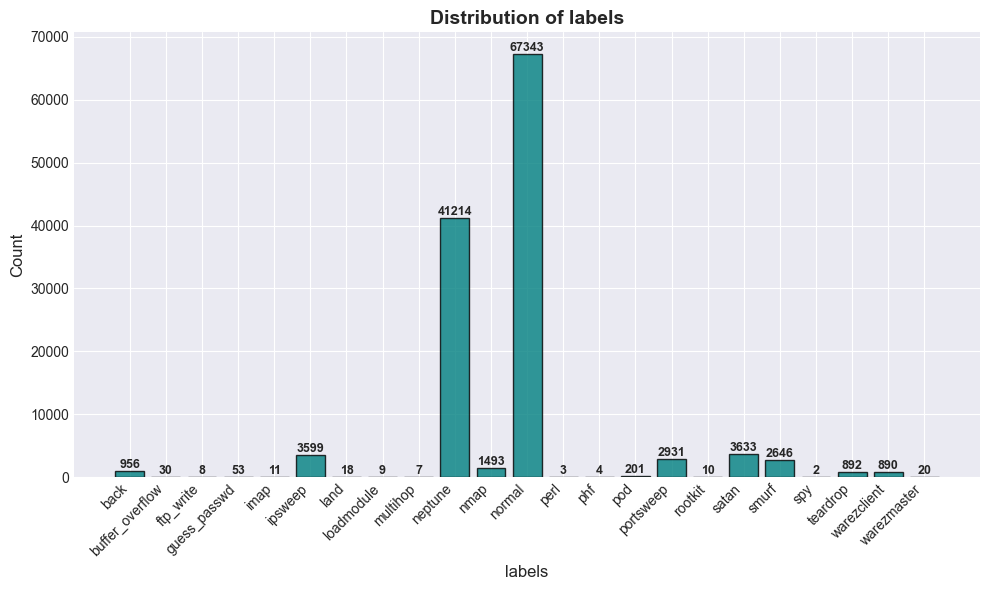


Value counts:
labels
back                 956
buffer_overflow       30
ftp_write              8
guess_passwd          53
imap                  11
ipsweep             3599
land                  18
loadmodule             9
multihop               7
neptune            41214
nmap                1493
normal             67343
perl                   3
phf                    4
pod                  201
portsweep           2931
rootkit               10
satan               3633
smurf               2646
spy                    2
teardrop             892
warezclient          890
warezmaster           20
Name: count, dtype: int64

Percentage distribution:
labels
back                0.76
buffer_overflow     0.02
ftp_write           0.01
guess_passwd        0.04
imap                0.01
ipsweep             2.86
land                0.01
loadmodule          0.01
multihop            0.01
neptune            32.72
nmap                1.19
normal             53.46
perl                0.00
phf                

In [5]:
# =============================================================================
# 4. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS ")
print("=" * 80)

def pick_target_column(df):
    # 1) common names across UNSW, NSL KDD, KDD99 and variants
    candidates = [
        "labels", "Label", "class", "Class", "target", "y",
        "attack_cat", "attack_category", "attack", "Attack",
        "Attack_cat", "Attack_Category", "Attack_type", "attack_type",
        "category", "Category", "Outcome"
    ]
    for c in candidates:
        if c in df.columns:
            return c

    # 2) heuristic: object or category columns with small number of uniques
    obj_like = [c for c in df.columns
                if df[c].dtype.name in ("object", "category")]
    small_obj = [c for c in obj_like if df[c].nunique(dropna=False) <= 60]
    if small_obj:
        return small_obj[0]

    # 3) heuristic: numeric columns with very few distinct values
    num_like = df.select_dtypes(include=[np.number])
    small_num = [c for c in num_like.columns if num_like[c].nunique(dropna=False) <= 10]
    if small_num:
        return small_num[0]

    return None

target_col = pick_target_column(data1)
if target_col is None:
    print("Could not find a target column in data1, please provide the correct column name.")
else:
    print(f"Using target column: {target_col}")

    counts = (
        data1[target_col]
        .astype(str)
        .fillna("NaN")
        .value_counts()
        .sort_index()
    )

    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index, counts.values, edgecolor="black", color="teal", alpha=0.8)
    plt.xlabel(target_col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Distribution of {target_col}", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45, ha="right")

    for rect in bars:
        h = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, h, f"{int(h)}",
                 ha="center", va="bottom", fontweight="bold", fontsize=9)

    plt.tight_layout()
    plt.savefig("target_distribution1.png", dpi=300, bbox_inches="tight")
    plt.show()

    print("\nValue counts:")
    print(counts)
    print("\nPercentage distribution:")
    print((counts / len(data1) * 100).round(2))




TARGET VARIABLE ANALYSIS 
Using target column: labels


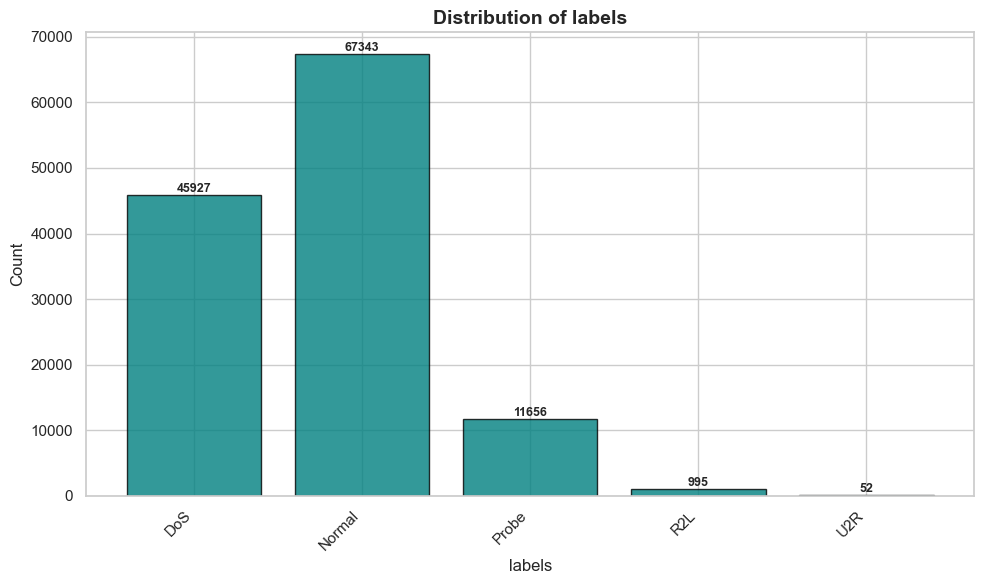


Value counts:
labels
DoS       45927
Normal    67343
Probe     11656
R2L         995
U2R          52
Name: count, dtype: int64

Percentage distribution:
labels
DoS       36.46
Normal    53.46
Probe      9.25
R2L        0.79
U2R        0.04
Name: count, dtype: float64


In [6]:
# =============================================================================
# 4. TARGET VARIABLE ANALYSIS
# =============================================================================

print("\n" + "=" * 80)
print("TARGET VARIABLE ANALYSIS ")
print("=" * 80)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA



import pandas as pd
sns.set(style="whitegrid")
# Load the datasets
df_train = pd.read_csv("kdd_train.csv")
df_test  = pd.read_csv("kdd_test.csv")

label_col = "labels" if "labels" in df_train.columns else "label"

# 23-to-5 mapping
# 39→5 mapping (covers train + test attack names)
attack_to_5 = {
    # Normal
    "normal": "Normal",

    # DoS
    "back": "DoS", "land": "DoS", "neptune": "DoS", "pod": "DoS",
    "smurf": "DoS", "teardrop": "DoS", "apache2": "DoS", "mailbomb": "DoS",
    "processtable": "DoS", "udpstorm": "DoS", "worm": "DoS",

    # Probe
    "ipsweep": "Probe", "nmap": "Probe", "portsweep": "Probe", "satan": "Probe",
    "mscan": "Probe", "saint": "Probe",

    # R2L
    "ftp_write": "R2L", "guess_passwd": "R2L", "imap": "R2L", "multihop": "R2L",
    "phf": "R2L", "spy": "R2L", "warezclient": "R2L", "warezmaster": "R2L",
    "sendmail": "R2L", "named": "R2L", "snmpgetattack": "R2L", "snmpguess": "R2L",
    "xlock": "R2L", "xsnoop": "R2L", "httptunnel": "R2L",

    # U2R
    "buffer_overflow": "U2R", "loadmodule": "U2R", "perl": "U2R", "rootkit": "U2R",
    "ps": "U2R", "xterm": "U2R",
}

# Update label column only
df_train[label_col] = (
    df_train[label_col].astype(str).str.lower().str.strip().map(attack_to_5)
)
df_test[label_col] = (
    df_test[label_col].astype(str).str.lower().str.strip().map(attack_to_5)
)

# Save new CSVs with 5-class labels
df_train.to_csv("kdd_train_5class.csv", index=False)
df_test.to_csv("kdd_test_5class.csv", index=False)
data1 = pd.read_csv('kdd_train_5class.csv')
data2 = pd.read_csv('kdd_test_5class.csv')

# Define target variable
target_col = 'labels'
X_train = data1.drop(columns=[target_col])
y_train = data1[target_col]

# Separate features and target for test
X_test = data2.drop(columns=[target_col])
y_test = data2[target_col]

def pick_target_column(df):
    # 1) common names across UNSW, NSL KDD, KDD99 and variants
    candidates = [
        "labels", "label", "class",  "y",
        "attack_cat",  "attack",
        "Attack_Category", "Attack_type",
        "category", "Outcome"
    ]
    for c in candidates:
        if c in df.columns:
            return c

    # 2) heuristic: object or category columns with small number of uniques
    obj_like = [c for c in df.columns
                if df[c].dtype.name in ("object", "category")]
    small_obj = [c for c in obj_like if df[c].nunique(dropna=False) <= 60]
    if small_obj:
        return small_obj[0]

    # 3) heuristic: numeric columns with very few distinct values
    num_like = df.select_dtypes(include=[np.number])
    small_num = [c for c in num_like.columns if num_like[c].nunique(dropna=False) <= 10]
    if small_num:
        return small_num[0]

    return None

target_col = pick_target_column(data1)
if target_col is None:
    print("Could not find a target column in data1, please provide the correct column name.")
else:
    print(f"Using target column: {target_col}")

    counts = (
        data1[target_col]
        .astype(str)
        .fillna("NaN")
        .value_counts()
        .sort_index()
    )

    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index, counts.values, edgecolor="black", color="teal", alpha=0.8)
    plt.xlabel(target_col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Distribution of {target_col}", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45, ha="right")

    for rect in bars:
        h = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2, h, f"{int(h)}",
                 ha="center", va="bottom", fontweight="bold", fontsize=9)

    plt.tight_layout()
    plt.savefig("target_distribution.png", dpi=300, bbox_inches="tight")
    plt.show()

    print("\nValue counts:")
    print(counts)
    print("\nPercentage distribution:")
    print((counts / len(data1) * 100).round(2))




CORRELATION ANALYSIS


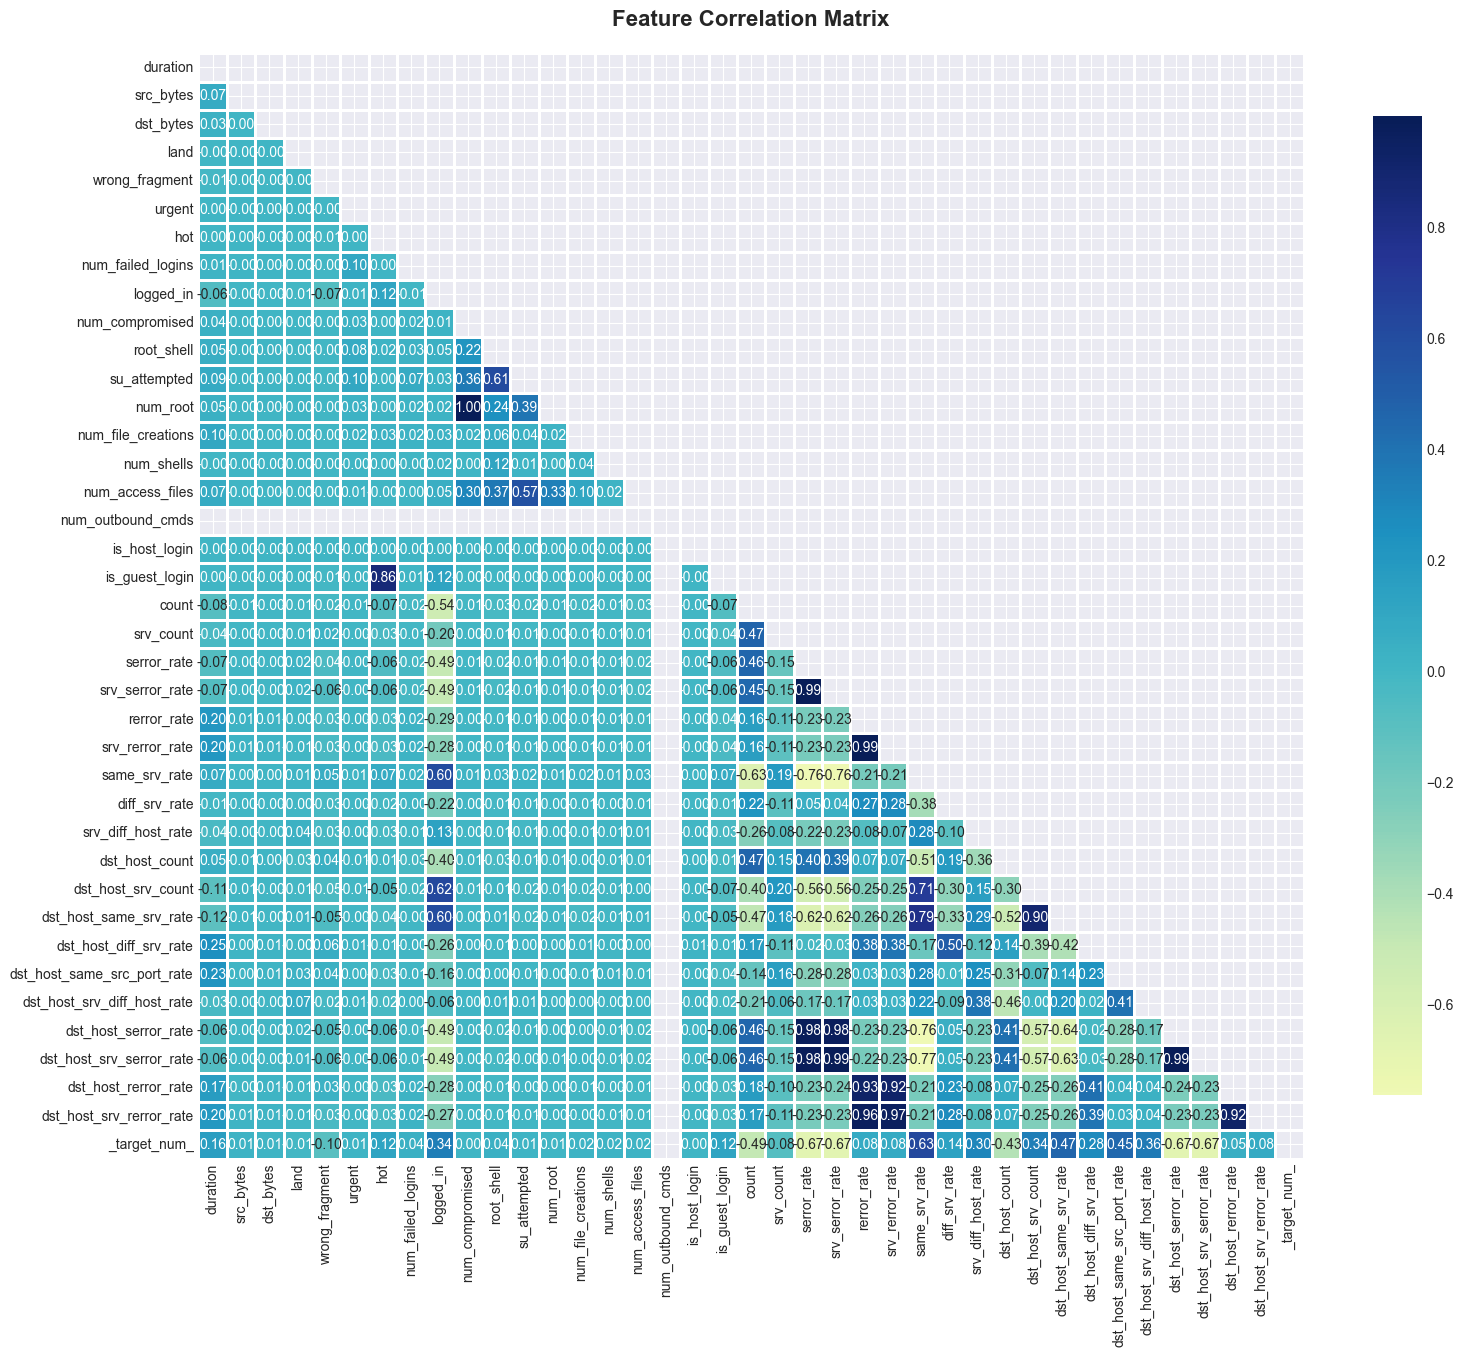


Top 10 Features Correlated with labels:
same_srv_rate                  0.626292
dst_host_same_srv_rate         0.465241
dst_host_same_src_port_rate    0.446731
dst_host_srv_diff_host_rate    0.359947
logged_in                      0.342547
dst_host_srv_count             0.337510
srv_diff_host_rate             0.299656
dst_host_diff_srv_rate         0.279212
duration                       0.161693
diff_srv_rate                  0.137083
Name: _target_num_, dtype: float64

Bottom 10 Features Correlated with labels:
land                       -0.010021
srv_count                  -0.079602
wrong_fragment             -0.101976
dst_host_count             -0.429019
count                      -0.485203
serror_rate                -0.670843
srv_serror_rate            -0.671694
dst_host_serror_rate       -0.672750
dst_host_srv_serror_rate   -0.674254
num_outbound_cmds                NaN
Name: _target_num_, dtype: float64


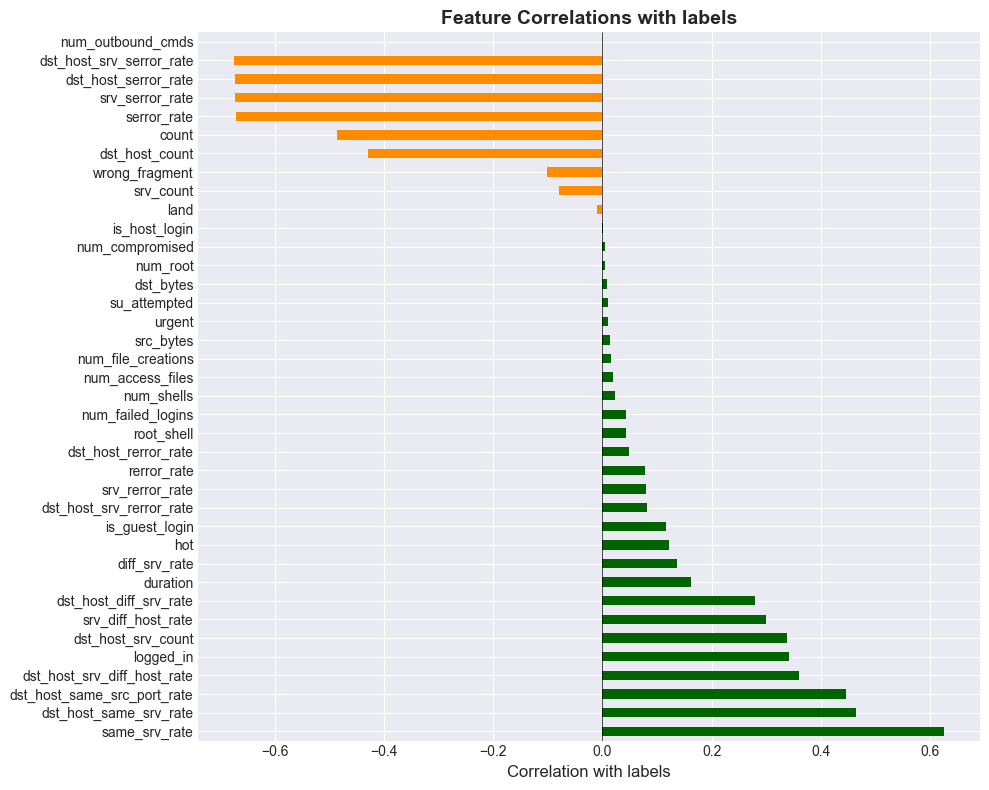

In [12]:
# =============================================================================
# 5. CORRELATION ANALYSIS
# =============================================================================



print("\n" + "=" * 80)
print("CORRELATION ANALYSIS")
print("=" * 80)

# prepare df from data1 (numeric only for correlations)
df = data1.copy()

# detect target and make numeric if needed
candidates = ["labels", "label", "attack_cat", "Attack_cat", "target", "y", "stress_level"]
TARGET_NAME = next((c for c in candidates if c in df.columns), None)

if TARGET_NAME is None:
    raise ValueError(f"No target column found among: {', '.join(candidates)}")

if not pd.api.types.is_numeric_dtype(df[TARGET_NAME]):
    le = LabelEncoder()
    df["_target_num_"] = le.fit_transform(df[TARGET_NAME].astype(str))
    target_for_corr = "_target_num_"
else:
    target_for_corr = TARGET_NAME

# keep only numeric columns, include encoded target if created
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_for_corr not in num_cols:
    df[target_for_corr] = df[target_for_corr]
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

correlation_matrix = df[num_cols].corr()

# heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(
    correlation_matrix, mask=mask, annot=True, fmt=".2f",
    cmap="YlGnBu", center=0, square=True, linewidths=1,
    cbar_kws={"shrink": .8}
)
plt.title("Feature Correlation Matrix", fontsize=16, fontweight="bold", pad=20)
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

# correlations with the target
stress_correlations = correlation_matrix[target_for_corr].drop(target_for_corr).sort_values(ascending=False)

print(f"\nTop 10 Features Correlated with {TARGET_NAME}:")
print(stress_correlations.head(10))
print(f"\nBottom 10 Features Correlated with {TARGET_NAME}:")
print(stress_correlations.tail(10))

# bar plot
plt.figure(figsize=(10, 8))
colors = ["darkgreen" if x > 0 else "darkorange" for x in stress_correlations]
stress_correlations.plot(kind="barh", color=colors)
plt.xlabel(f"Correlation with {TARGET_NAME}", fontsize=12)
plt.title(f"Feature Correlations with {TARGET_NAME}", fontsize=14, fontweight="bold")
plt.axvline(x=0, color="black", linestyle="-", linewidth=0.5)
plt.tight_layout()
plt.savefig("attack_correlations.png", dpi=300, bbox_inches="tight")
plt.show()



In [13]:
# =============================================================================
# 6. MULTICOLLINEARITY DETECTION
# =============================================================================

print("\n" + "=" * 80)
print("MULTICOLLINEARITY DETECTION")
print("=" * 80)

# Find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:  # Threshold of 0.7
            high_corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if high_corr_pairs:
    high_corr_df = pd.DataFrame(high_corr_pairs).sort_values('Correlation', ascending=False)
    print("\nHighly Correlated Feature Pairs (|correlation| > 0.7):")
    print(high_corr_df)
else:
    print("\nNo highly correlated feature pairs found (threshold: 0.7)")


MULTICOLLINEARITY DETECTION

Highly Correlated Feature Pairs (|correlation| > 0.7):
               Feature 1                 Feature 2  Correlation
1        num_compromised                  num_root     0.998833
2            serror_rate           srv_serror_rate     0.993289
9            rerror_rate           srv_rerror_rate     0.989008
8        srv_serror_rate  dst_host_srv_serror_rate     0.986252
19  dst_host_serror_rate  dst_host_srv_serror_rate     0.985052
5            serror_rate  dst_host_srv_serror_rate     0.981139
4            serror_rate      dst_host_serror_rate     0.979373
7        srv_serror_rate      dst_host_serror_rate     0.977596
13       srv_rerror_rate  dst_host_srv_rerror_rate     0.970208
11           rerror_rate  dst_host_srv_rerror_rate     0.964449
10           rerror_rate      dst_host_rerror_rate     0.926749
20  dst_host_rerror_rate  dst_host_srv_rerror_rate     0.924688
12       srv_rerror_rate      dst_host_rerror_rate     0.917822
18    dst_host_srv_


BIVARIATE ANALYSIS


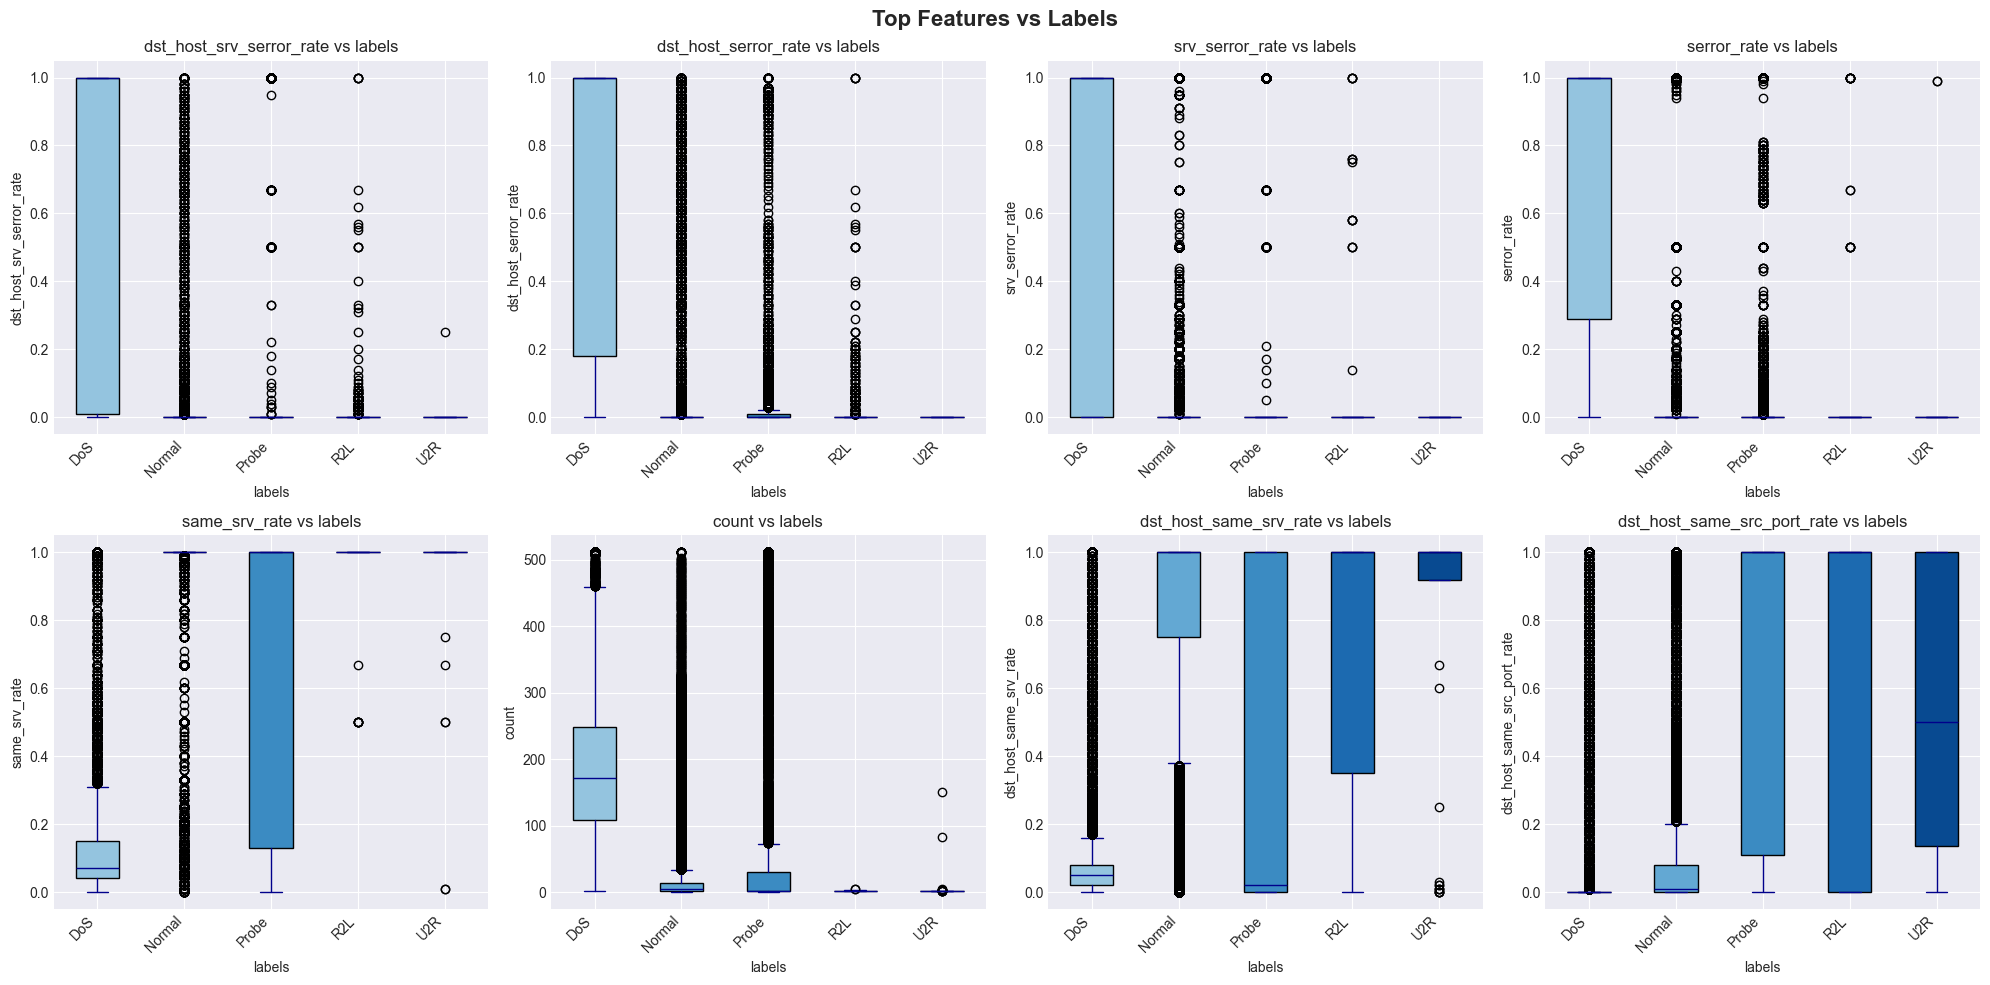

In [14]:
# =============================================================================
# 7. BIVARIATE ANALYSIS - FEATURE VS LABELS
# =============================================================================



print("\n" + "=" * 80)
print("BIVARIATE ANALYSIS")
print("=" * 80)

# Select top features based on correlation with labels
target_col = "labels"
assert target_col in data1.columns, f"{target_col} not found in data1"

# encode labels to numeric for correlation
data1["_label_num_"] = data1[target_col].astype("category").cat.codes

# correlations on numeric columns only
num_only = data1.select_dtypes(include=[np.number]).copy()
if "_label_num_" not in num_only.columns:
    num_only["_label_num_"] = data1["_label_num_"]

corr = num_only.corr()
label_correlations = corr["_label_num_"].drop(labels=["_label_num_"])

# pick top 8 by absolute correlation
top_features = label_correlations.abs().nlargest(8).index.tolist()

# Create box plots for top features vs labels
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

levels = sorted(data1[target_col].unique())

for idx, feature in enumerate(top_features):
    # Group data by label for the current feature
    data_to_plot = [data1[data1[target_col] == lvl][feature].values for lvl in levels]

    # Create box plot with custom colors
    bp = axes[idx].boxplot(data_to_plot, patch_artist=True)

    # Color the boxes with a gradient of blues
    colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(bp['boxes'])))
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)

    # Customize other elements
    for element in ['whiskers', 'fliers', 'medians', 'caps']:
        plt.setp(bp[element], color='darkblue')

    axes[idx].set_title(f'{feature} vs {target_col}', fontsize=12)
    axes[idx].set_xlabel(target_col)
    axes[idx].set_ylabel(feature)
    axes[idx].set_xticklabels(levels, rotation=45, ha='right')

# remove any unused subplots if fewer than 8 features
for j in range(len(top_features), 8):
    fig.delaxes(axes[j])

plt.suptitle('Top Features vs Labels', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_vs_labels_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

# clean helper column
data1.drop(columns=['_label_num_'], inplace=True, errors='ignore')



OUTLIER DETECTION

Outlier Summary (IQR Method):
                               count  percentage
srv_diff_host_rate           28399.0   22.543720
dst_host_same_src_port_rate  25052.0   19.886801
dst_bytes                    23579.0   18.717503
dst_host_rerror_rate         22795.0   18.095147
dst_host_srv_rerror_rate     19357.0   15.365991
srv_rerror_rate              16206.0   12.864661
rerror_rate                  16190.0   12.851960
src_bytes                    13840.0   10.986481
srv_count                    12054.0    9.568717
dst_host_srv_diff_host_rate  11682.0    9.273416
dst_host_diff_srv_rate       10550.0    8.374810
duration                     10018.0    7.952498
diff_srv_rate                 7788.0    6.182277
count                         3157.0    2.506093
hot                           2671.0    2.120296
num_compromised               1286.0    1.020854
is_guest_login                1187.0    0.942265
wrong_fragment                1090.0    0.865265
num_root           

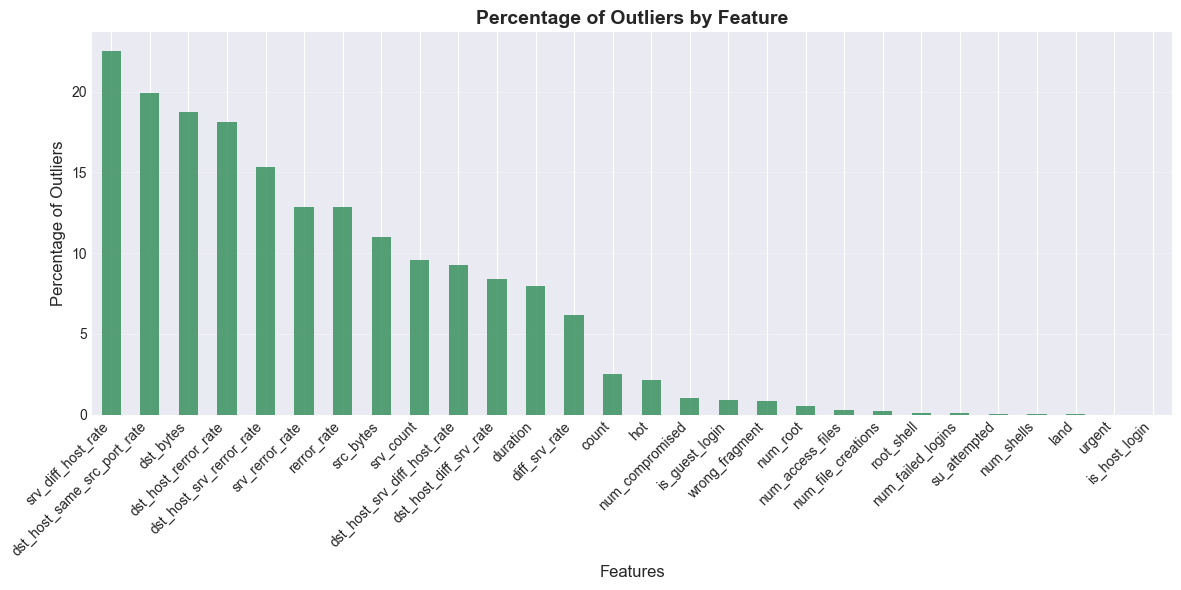

In [15]:
# =============================================================================
# 8. OUTLIER DETECTION
# =============================================================================


print("\n" + "=" * 80)
print("OUTLIER DETECTION")
print("=" * 80)

# Work on data1 directly
df = data1.copy()

# Define target
target_col = "labels"
assert target_col in df.columns, f"{target_col} not found in data1"

# Select numeric columns only (exclude target if numeric)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if target_col in num_cols:
    num_cols.remove(target_col)

# Detect outliers using IQR method
outlier_summary = {}
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    outlier_summary[col] = {
        'count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100
    }

# Create DataFrame of results
outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values('count', ascending=False)

# Display outlier summary
print("\nOutlier Summary (IQR Method):")
print(outlier_df[outlier_df['count'] > 0])

# Visualize outlier percentages
plt.figure(figsize=(12, 6))
outlier_df[outlier_df['count'] > 0]['percentage'].plot(kind='bar', color='seagreen', alpha=0.8)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Percentage of Outliers', fontsize=12)
plt.title('Percentage of Outliers by Feature', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('outlier_percentages.png', dpi=300, bbox_inches='tight')
plt.show()



FEATURE IMPORTANCE ANALYSIS

Mutual Information Scores:
                        Feature  MI Score
4                     src_bytes  0.714090
2                       service  0.596158
29                diff_srv_rate  0.506952
3                          flag  0.489171
28                same_srv_rate  0.470689
5                     dst_bytes  0.461526
34       dst_host_diff_srv_rate  0.450372
32           dst_host_srv_count  0.421179
22                        count  0.412591
33       dst_host_same_srv_rate  0.406548
37         dst_host_serror_rate  0.403426
24                  serror_rate  0.388382
38     dst_host_srv_serror_rate  0.378379
25              srv_serror_rate  0.361828
11                    logged_in  0.319116
36  dst_host_srv_diff_host_rate  0.259970
35  dst_host_same_src_port_rate  0.234599
31               dst_host_count  0.211713
23                    srv_count  0.162343
30           srv_diff_host_rate  0.145881
39         dst_host_rerror_rate  0.095380
40     dst_host_srv

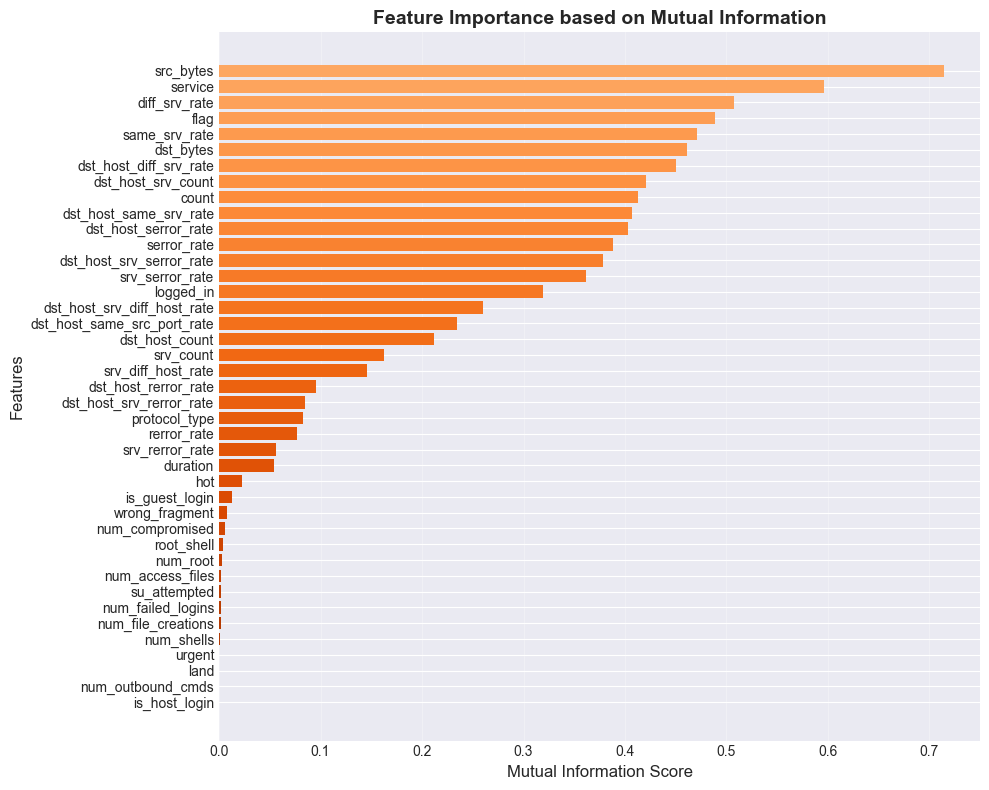

In [16]:
# =============================================================================
# 9. FEATURE IMPORTANCE USING MUTUAL INFORMATION
# =============================================================================


print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Work on a copy
df = data1.copy()

# Target
target_col = "labels"
assert target_col in df.columns, f"{target_col} not found in data1"

# Encode target to integers
y = df[target_col].astype(str)
le_y = LabelEncoder()
y_enc = le_y.fit_transform(y)

# Encode common categorical predictors if present
cat_cols = [c for c in ["protocol_type", "service", "flag"] if c in df.columns]
encoders = {c: LabelEncoder().fit(df[c].astype(str)) for c in cat_cols}
for c, enc in encoders.items():
    df[c] = enc.transform(df[c].astype(str))

# Features and discrete mask
X = df.drop(columns=[target_col])
feature_names = X.columns.tolist()
discrete_mask = np.array([col in cat_cols for col in feature_names])

# Mutual information for classification
mi_scores = mutual_info_classif(
    X.values, y_enc, discrete_features=discrete_mask, random_state=42
)

mi_scores_df = pd.DataFrame({
    "Feature": feature_names,
    "MI Score": mi_scores
}).sort_values("MI Score", ascending=False)

print("\nMutual Information Scores:")
print(mi_scores_df)

# Plot
plt.figure(figsize=(10, 8))
colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(mi_scores_df)))
plt.barh(mi_scores_df["Feature"], mi_scores_df["MI Score"], color=colors)
plt.xlabel("Mutual Information Score", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.title("Feature Importance based on Mutual Information", fontsize=14, fontweight="bold")
plt.gca().invert_yaxis()
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.savefig("mutual_information_scores.png", dpi=300, bbox_inches="tight")
plt.show()


After One Hot shapes: (125973, 122) (22544, 122)
After Normalization shapes: (125973, 122) (22544, 122)
After weighting shapes: (125973, 122) (22544, 122)
After zero mean shapes: (125973, 122) (22544, 122)
Max possible PCs from data: 122
PCA learned PCs: 122
Components for 95 percent variance: 10
Components for 99 percent variance: 17
PCA components kept: 17
After PCA shapes: (125973, 17) (22544, 17)


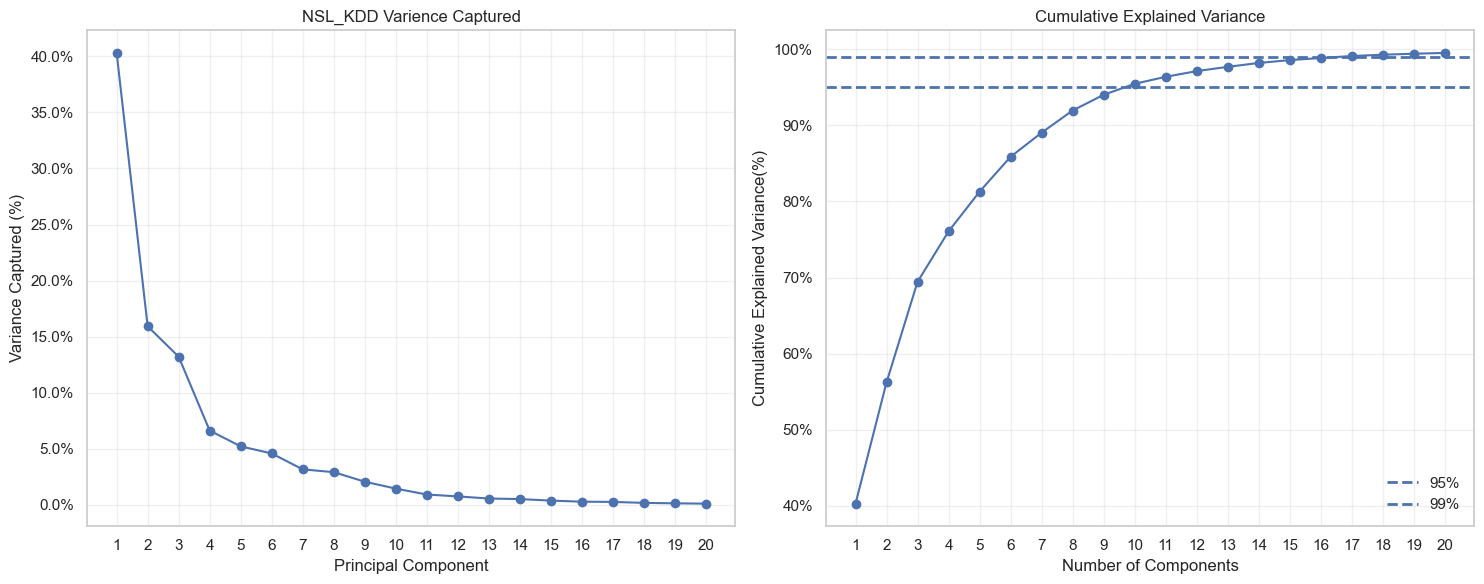


Variance captured by the first 16 PCs in percent:
PC01: 40.30%
PC02: 15.92%
PC03: 13.21%
PC04: 6.62%
PC05: 5.21%
PC06: 4.58%
PC07: 3.16%
PC08: 2.91%
PC09: 2.06%
PC10: 1.45%
PC11: 0.92%
PC12: 0.75%
PC13: 0.56%
PC14: 0.51%
PC15: 0.37%
PC16: 0.28%

Total variance captured by first 16 components: 98.83%


In [13]:
# =============================================================================
# End to end pipeline
# Data -> One Hot -> Normalize -> Information Gain -> Weight -> Zero Mean -> PCA
# Includes: max PCs check and flexible plotting of x axis
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from matplotlib.ticker import PercentFormatter
# Set seaborn style (white background with grids)
sns.set(style="whitegrid")
# -----------------------------
# 0) Load train and test splits
# -----------------------------
df_train = pd.read_csv("kdd_train.csv")
df_test  = pd.read_csv("kdd_test.csv")

label_col = "labels" if "labels" in df_train.columns else "label"

# 39→5 mapping (covers train + test attack names)
attack_to_5 = {
    # Normal
    "normal": "Normal",
    # DoS
    "back": "DoS", "land": "DoS", "neptune": "DoS", "pod": "DoS",
    "smurf": "DoS", "teardrop": "DoS", "apache2": "DoS", "mailbomb": "DoS",
    "processtable": "DoS", "udpstorm": "DoS", "worm": "DoS",
    # Probe
    "ipsweep": "Probe", "nmap": "Probe", "portsweep": "Probe", "satan": "Probe",
    "mscan": "Probe", "saint": "Probe",
    # R2L
    "ftp_write": "R2L", "guess_passwd": "R2L", "imap": "R2L", "multihop": "R2L",
    "phf": "R2L", "spy": "R2L", "warezclient": "R2L", "warezmaster": "R2L",
    "sendmail": "R2L", "named": "R2L", "snmpgetattack": "R2L", "snmpguess": "R2L",
    "xlock": "R2L", "xsnoop": "R2L", "httptunnel": "R2L",
    # U2R
    "buffer_overflow": "U2R", "loadmodule": "U2R", "perl": "U2R", "rootkit": "U2R",
    "ps": "U2R", "xterm": "U2R",
}

# Update label column only
df_train[label_col] = (
    df_train[label_col].astype(str).str.lower().str.strip().map(attack_to_5)
)
df_test[label_col] = (
    df_test[label_col].astype(str).str.lower().str.strip().map(attack_to_5)
)

# Save new CSVs with 5-class labels
df_train.to_csv("kdd_train_5class.csv", index=False)
df_test.to_csv("kdd_test_5class.csv", index=False)
data1 = pd.read_csv('kdd_train_5class.csv')
data2 = pd.read_csv('kdd_test_5class.csv')

# Define target variable
target_col = 'labels'
X_train = data1.drop(columns=[target_col])
y_train = data1[target_col]
X_test = data2.drop(columns=[target_col])
y_test = data2[target_col]

# Safe fallback to keep this cell runnable without files
try:
    _ = (X_train.shape, X_test.shape, len(y_train), len(y_test))
except Exception:
    rng = np.random.RandomState(42)
    n = 300
    df_all = pd.DataFrame({
        "num1": rng.randn(n),
        "num2": rng.rand(n) * 5,
        "cat1": rng.choice(["tcp", "udp", "icmp"], size=n),
        "cat2": rng.choice(["low", "med", "high"], size=n),
    })
    y_all = (
        (df_all["num1"] + 0.8 * df_all["num2"]
         + (df_all["cat1"] == "tcp").astype(int)
         + (df_all["cat2"] == "high").astype(int)
         + rng.randn(n)*0.5) > 3
    ).astype(int)
    idx = np.arange(n)
    rng.shuffle(idx)
    cut = int(n*0.75)
    tr, te = idx[:cut], idx[cut:]
    X_train = df_all.iloc[tr].reset_index(drop=True)
    X_test  = df_all.iloc[te].reset_index(drop=True)
    y_train = y_all.iloc[tr].reset_index(drop=True)
    y_test  = y_all.iloc[te].reset_index(drop=True)

# -----------------------------------------
# 1) Identify types and one hot encode cats
# -----------------------------------------
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train.select_dtypes(exclude=["object", "category"]).columns.tolist()

try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = ohe.fit_transform(X_train[cat_cols]) if len(cat_cols) > 0 else np.empty((len(X_train), 0))
X_test_cat  = ohe.transform(X_test[cat_cols])      if len(cat_cols) > 0 else np.empty((len(X_test), 0))

X_train_num = X_train[num_cols].to_numpy(dtype=float) if len(num_cols) > 0 else np.empty((len(X_train), 0))
X_test_num  = X_test[num_cols].to_numpy(dtype=float)  if len(num_cols) > 0 else np.empty((len(X_test), 0))

X_train_oh = np.hstack([X_train_cat, X_train_num])
X_test_oh  = np.hstack([X_test_cat,  X_test_num])

print("After One Hot shapes:", X_train_oh.shape, X_test_oh.shape)

# Replace inf with nan then drop rows only from train to keep fit stable
X_train_oh = np.where(np.isfinite(X_train_oh), X_train_oh, np.nan)
good_rows = ~np.isnan(X_train_oh).any(axis=1)
X_train_oh = X_train_oh[good_rows]
y_train = np.asarray(y_train)[good_rows]

# --------------------------------
# STEP 2: Normalization with MinMaxScaler
# ================================
scaler =  StandardScaler()
X_train_norm = scaler.fit_transform(X_train_oh)
X_test_norm  = scaler.transform(X_test_oh)

print("After Normalization shapes:", X_train_norm.shape, X_test_norm.shape)
# ---------------------------------------------
# 3) Information gain on train, convert to weights
# ---------------------------------------------
mi = mutual_info_classif(X_train_norm, np.asarray(y_train), random_state=42, discrete_features=False)
mi_max = float(np.max(mi)) if float(np.max(mi)) > 0 else 1.0
weights = mi / mi_max
weights = np.where(weights == 0, 1e-6, weights)

# --------------------------------
# 4) Apply feature weights
# --------------------------------
X_train_w = X_train_norm * weights
X_test_w  = X_test_norm  * weights
print("After weighting shapes:", X_train_w.shape, X_test_w.shape)

# --------------------------------
# 5) Zero mean centering with train mean
# --------------------------------
train_means = X_train_w.mean(axis=0)
X_train_c = X_train_w - train_means
X_test_c  = X_test_w  - train_means

print("After zero mean shapes:", X_train_c.shape, X_test_c.shape)

# --------------------------------
# 6) PCA spectrum and component counts
# --------------------------------
pca_full = PCA(svd_solver="full", whiten=False)
pca_full.fit(X_train_c)

exp_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(exp_var)

max_possible_pcs = min(X_train_c.shape[0] - 1, X_train_c.shape[1])
print("Max possible PCs from data:", max_possible_pcs)
print("PCA learned PCs:", pca_full.n_components_)

k95 = int(np.searchsorted(cum_var, 0.95) + 1)
k99 = int(np.searchsorted(cum_var, 0.99) + 1)
print(f"Components for 95 percent variance: {k95}")
print(f"Components for 99 percent variance: {k99}")

# Keep a PCA model at your target variance
target_variance = 0.99  # set to 0.95 if you want the 95 percent frontier directly
pca = PCA(n_components=target_variance, svd_solver="full", whiten=False)
X_train_pca = pca.fit_transform(X_train_c)
X_test_pca  = pca.transform(X_test_c)

print("PCA components kept:", pca.n_components_)
print("After PCA shapes:", X_train_pca.shape, X_test_pca.shape)

# --------------------------------
# 7) Save variance plots to file  (top 20 PCs only)
# --------------------------------
from matplotlib.ticker import PercentFormatter

max_k = min(20, len(exp_var))        # cap x axis to 20 components
idx = np.arange(1, max_k + 1)
exp = exp_var[:max_k]
cum = cum_var[:max_k]

plt.figure(figsize=(15, 6))

# Scree
plt.subplot(1, 2, 1)
plt.plot(idx, exp, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured (%)')
plt.title('NSL_KDD Varience Captured')
plt.xticks(idx)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.grid(True, alpha=0.3)

# Cumulative
plt.subplot(1, 2, 2)
plt.plot(idx, cum, marker='o')
plt.axhline(y=0.95, linestyle='--', linewidth=2, label='95%')
plt.axhline(y=target_variance, linestyle='--', linewidth=2, label=f'{int(target_variance*100)}%')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance(%)')
plt.title('Cumulative Explained Variance')
plt.xticks(idx)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysisnsl_kdd22.png', dpi=300, bbox_inches='tight')
plt.show()


# --------------------------------
# 8) Print the first 16 PCs contributions
# --------------------------------
top_n = min(16, len(exp_var))
print("\nVariance captured by the first 16 PCs in percent:")
for i in range(top_n):
    print(f"PC{i+1:02d}: {exp_var[i]*100:.2f}%")
print(f"\nTotal variance captured by first {top_n} components: {cum_var[top_n-1]*100:.2f}%")


After One Hot shapes: (125973, 122) (22544, 122)
After Normalization shapes: (125973, 122) (22544, 122)
After weighting shapes: (125973, 122) (22544, 122)
After zero mean shapes: (125973, 122) (22544, 122)
Max possible PCs from data: 122
PCA learned PCs: 122
Components for 95 percent variance: 8
Components for 99 percent variance: 14
PCA components kept: 14
After PCA shapes: (125973, 14) (22544, 14)


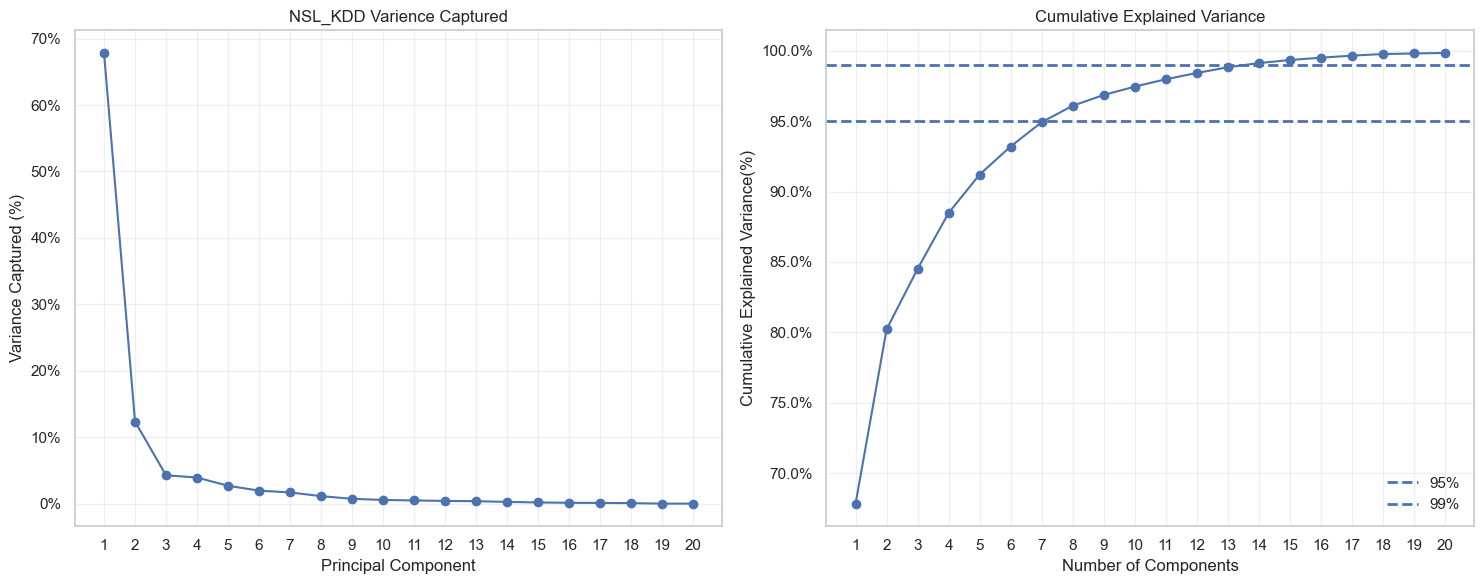


Variance captured by the first 16 PCs in percent:
PC01: 67.83%
PC02: 12.38%
PC03: 4.30%
PC04: 3.97%
PC05: 2.73%
PC06: 2.00%
PC07: 1.73%
PC08: 1.17%
PC09: 0.77%
PC10: 0.59%
PC11: 0.52%
PC12: 0.45%
PC13: 0.41%
PC14: 0.30%
PC15: 0.22%
PC16: 0.16%

Total variance captured by first 16 components: 99.51%


In [14]:
# =============================================================================
# End to end pipeline
# Data -> One Hot -> Normalize -> Information Gain -> Weight -> Zero Mean -> PCA
# Includes: max PCs check and flexible plotting of x axis
# =============================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

# -----------------------------
# 0) Load train and test splits
# -----------------------------
sns.set(style="whitegrid")
# Load the datasets
df_train = pd.read_csv("kdd_train.csv")
df_test  = pd.read_csv("kdd_test.csv")

label_col = "labels" if "labels" in df_train.columns else "label"

# 39→5 mapping (covers train + test attack names)
attack_to_5 = {
    # Normal
    "normal": "Normal",

    # DoS
    "back": "DoS", "land": "DoS", "neptune": "DoS", "pod": "DoS",
    "smurf": "DoS", "teardrop": "DoS", "apache2": "DoS", "mailbomb": "DoS",
    "processtable": "DoS", "udpstorm": "DoS", "worm": "DoS",

    # Probe
    "ipsweep": "Probe", "nmap": "Probe", "portsweep": "Probe", "satan": "Probe",
    "mscan": "Probe", "saint": "Probe",

    # R2L
    "ftp_write": "R2L", "guess_passwd": "R2L", "imap": "R2L", "multihop": "R2L",
    "phf": "R2L", "spy": "R2L", "warezclient": "R2L", "warezmaster": "R2L",
    "sendmail": "R2L", "named": "R2L", "snmpgetattack": "R2L", "snmpguess": "R2L",
    "xlock": "R2L", "xsnoop": "R2L", "httptunnel": "R2L",

    # U2R
    "buffer_overflow": "U2R", "loadmodule": "U2R", "perl": "U2R", "rootkit": "U2R",
    "ps": "U2R", "xterm": "U2R",
}

# Update label column only
df_train[label_col] = (
    df_train[label_col].astype(str).str.lower().str.strip().map(attack_to_5)
)
df_test[label_col] = (
    df_test[label_col].astype(str).str.lower().str.strip().map(attack_to_5)
)

# Save new CSVs with 5-class labels
df_train.to_csv("kdd_train_5class.csv", index=False)
df_test.to_csv("kdd_test_5class.csv", index=False)
data1 = pd.read_csv('kdd_train_5class.csv')
data2 = pd.read_csv('kdd_test_5class.csv')

# Define target variable
target_col = 'labels'
X_train = data1.drop(columns=[target_col])
y_train = data1[target_col]

# Separate features and target for test
X_test = data2.drop(columns=[target_col])
y_test = data2[target_col]


# Safe fallback to keep this cell runnable without files
try:
    _ = (X_train.shape, X_test.shape, len(y_train), len(y_test))
except Exception:
    rng = np.random.RandomState(42)
    n = 300
    df_all = pd.DataFrame({
        "num1": rng.randn(n),
        "num2": rng.rand(n) * 5,
        "cat1": rng.choice(["tcp", "udp", "icmp"], size=n),
        "cat2": rng.choice(["low", "med", "high"], size=n),
    })
    y_all = (
        (df_all["num1"] + 0.8 * df_all["num2"]
         + (df_all["cat1"] == "tcp").astype(int)
         + (df_all["cat2"] == "high").astype(int)
         + rng.randn(n)*0.5) > 3
    ).astype(int)
    idx = np.arange(n)
    rng.shuffle(idx)
    cut = int(n*0.75)
    tr, te = idx[:cut], idx[cut:]
    X_train = df_all.iloc[tr].reset_index(drop=True)
    X_test  = df_all.iloc[te].reset_index(drop=True)
    y_train = y_all.iloc[tr].reset_index(drop=True)
    y_test  = y_all.iloc[te].reset_index(drop=True)

# -----------------------------------------
# 1) Identify types and one hot encode cats
# -----------------------------------------
cat_cols = X_train.select_dtypes(include=["object", "category"]).columns.tolist()
num_cols = X_train.select_dtypes(exclude=["object", "category"]).columns.tolist()

try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

X_train_cat = ohe.fit_transform(X_train[cat_cols]) if len(cat_cols) > 0 else np.empty((len(X_train), 0))
X_test_cat  = ohe.transform(X_test[cat_cols])      if len(cat_cols) > 0 else np.empty((len(X_test), 0))

X_train_num = X_train[num_cols].to_numpy(dtype=float) if len(num_cols) > 0 else np.empty((len(X_train), 0))
X_test_num  = X_test[num_cols].to_numpy(dtype=float)  if len(num_cols) > 0 else np.empty((len(X_test), 0))

X_train_oh = np.hstack([X_train_cat, X_train_num])
X_test_oh  = np.hstack([X_test_cat,  X_test_num])

print("After One Hot shapes:", X_train_oh.shape, X_test_oh.shape)

# Replace inf with nan then drop rows only from train to keep fit stable
X_train_oh = np.where(np.isfinite(X_train_oh), X_train_oh, np.nan)
good_rows = ~np.isnan(X_train_oh).any(axis=1)
X_train_oh = X_train_oh[good_rows]
y_train = np.asarray(y_train)[good_rows]

# --------------------------------
# 2) Normalize with MinMaxScaler
# --------------------------------
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_oh)
X_test_norm  = scaler.transform(np.where(np.isfinite(X_test_oh), X_test_oh, 0.0))

print("After Normalization shapes:", X_train_norm.shape, X_test_norm.shape)

# ---------------------------------------------
# 3) Information gain on train, convert to weights
# ---------------------------------------------
mi = mutual_info_classif(X_train_norm, np.asarray(y_train), random_state=42, discrete_features=False)
mi_max = float(np.max(mi)) if float(np.max(mi)) > 0 else 1.0
weights = mi / mi_max
weights = np.where(weights == 0, 1e-6, weights)

# --------------------------------
# 4) Apply feature weights
# --------------------------------
X_train_w = X_train_norm * weights
X_test_w  = X_test_norm  * weights
print("After weighting shapes:", X_train_w.shape, X_test_w.shape)

# --------------------------------
# 5) Zero mean centering with train mean
# --------------------------------
train_means = X_train_w.mean(axis=0)
X_train_c = X_train_w - train_means
X_test_c  = X_test_w  - train_means

print("After zero mean shapes:", X_train_c.shape, X_test_c.shape)

# --------------------------------
# 6) PCA spectrum and component counts
# --------------------------------
pca_full = PCA(svd_solver="full", whiten=False)
pca_full.fit(X_train_c)

exp_var = pca_full.explained_variance_ratio_
cum_var = np.cumsum(exp_var)

max_possible_pcs = min(X_train_c.shape[0] - 1, X_train_c.shape[1])
print("Max possible PCs from data:", max_possible_pcs)
print("PCA learned PCs:", pca_full.n_components_)

k95 = int(np.searchsorted(cum_var, 0.95) + 1)
k99 = int(np.searchsorted(cum_var, 0.99) + 1)
print(f"Components for 95 percent variance: {k95}")
print(f"Components for 99 percent variance: {k99}")

# Keep a PCA model at your target variance
target_variance = 0.99  # set to 0.95 if you want the 95 percent frontier directly
pca = PCA(n_components=target_variance, svd_solver="full", whiten=False)
X_train_pca = pca.fit_transform(X_train_c)
X_test_pca  = pca.transform(X_test_c)

print("PCA components kept:", pca.n_components_)
print("After PCA shapes:", X_train_pca.shape, X_test_pca.shape)

# --------------------------------
# 7) Save variance plots to file  (top 20 PCs only)
# --------------------------------
from matplotlib.ticker import PercentFormatter

max_k = min(20, len(exp_var))        # cap x axis to 20 components
idx = np.arange(1, max_k + 1)
exp = exp_var[:max_k]
cum = cum_var[:max_k]

plt.figure(figsize=(15, 6))

# Scree
plt.subplot(1, 2, 1)
plt.plot(idx, exp, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Variance Captured (%)')
plt.title('NSL_KDD Varience Captured')
plt.xticks(idx)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.grid(True, alpha=0.3)

# Cumulative
plt.subplot(1, 2, 2)
plt.plot(idx, cum, marker='o')
plt.axhline(y=0.95, linestyle='--', linewidth=2, label='95%')
plt.axhline(y=target_variance, linestyle='--', linewidth=2, label=f'{int(target_variance*100)}%')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance(%)')
plt.title('Cumulative Explained Variance')
plt.xticks(idx)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('pca_analysisnsl_kdd.png', dpi=300, bbox_inches='tight')
plt.show()


# --------------------------------
# 8) Print the first 16 PCs contributions
# --------------------------------
top_n = min(16, len(exp_var))
print("\nVariance captured by the first 16 PCs in percent:")
for i in range(top_n):
    print(f"PC{i+1:02d}: {exp_var[i]*100:.2f}%")
print(f"\nTotal variance captured by first {top_n} components: {cum_var[top_n-1]*100:.2f}%")





In [20]:
# =============================================================================
# 11. STATISTICAL TESTS
# =============================================================================

print("\n" + "=" * 80)
print("STATISTICAL TESTS")
print("=" * 80)

# Work on a copy
df = data1.copy()
target_col = "labels"
assert target_col in df.columns, f"{target_col} not found in data1"

# Select numeric columns only (for normality test)
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# -------------------------------------------------------------------------
# Test 1: Normality Test (for each numeric feature)
# -------------------------------------------------------------------------
print("\nNormality Tests (D'Agostino and Pearson):")
for col in num_cols[:10]:  # limit to first 10 for brevity
    try:
        stat, p_val = stats.normaltest(df[col].dropna())
        normal = "Yes" if p_val > 0.05 else "No"
        print(f"{col:25s} -> Statistic: {stat:8.4f} | P-value: {p_val:8.4f} | Normal? {normal}")
    except Exception as e:
        print(f"{col:25s} -> Skipped (Error: {e})")

# -------------------------------------------------------------------------
# Test 2: ANOVA — check if mean feature values differ significantly among label groups
# -------------------------------------------------------------------------
print("\nANOVA Tests (Feature groups by labels):")

# Keep numeric features for ANOVA
for feature in num_cols[:10]:  # top 10 numeric features for demonstration
    try:
        groups = [group[feature].values for name, group in df.groupby(target_col)]
        f_stat, p_val = stats.f_oneway(*groups)
        sig = "Yes" if p_val < 0.05 else "No"
        print(f"\n{feature}:")
        print(f"  F-statistic: {f_stat:.4f}")
        print(f"  P-value:     {p_val:.4f}")
        print(f"  Significant difference among label groups? {sig}")
    except Exception as e:
        print(f"\n{feature}: Skipped (Error: {e})")



STATISTICAL TESTS

Normality Tests (D'Agostino and Pearson):
duration                  -> Statistic: 212448.4676 | P-value:   0.0000 | Normal? No
src_bytes                 -> Statistic: 607610.9475 | P-value:   0.0000 | Normal? No
dst_bytes                 -> Statistic: 683566.5477 | P-value:   0.0000 | Normal? No
land                      -> Statistic: 446089.2727 | P-value:   0.0000 | Normal? No
wrong_fragment            -> Statistic: 207433.9823 | P-value:   0.0000 | Normal? No
urgent                    -> Statistic: 566172.9529 | P-value:   0.0000 | Normal? No
hot                       -> Statistic: 218619.8775 | P-value:   0.0000 | Normal? No
num_failed_logins         -> Statistic: 406156.4478 | P-value:   0.0000 | Normal? No
logged_in                 -> Statistic: 488099.5297 | P-value:   0.0000 | Normal? No
num_compromised           -> Statistic: 656383.4541 | P-value:   0.0000 | Normal? No

ANOVA Tests (Feature groups by labels):

duration:
  F-statistic: 1632.1666
  P-value: 

In [21]:
# =============================================================================
# 12. DATA PREPROCESSING RECOMMENDATIONS
# =============================================================================

print("\n" + "=" * 80)
print("DATA PREPROCESSING RECOMMENDATIONS")
print("=" * 80)
# ==== setup for data1 and labels so the structure below works unchanged ====
df = data1.copy()
target_col = "labels"

# high_corr_pairs as a truthy list if strong correlations exist
num_df = df.select_dtypes(include=[np.number])
corr_abs = num_df.corr().abs()
upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
_high_pairs_df = (
    upper.stack()
         .reset_index()
         .rename(columns={"level_0":"feature_1","level_1":"feature_2",0:"corr"})
         .sort_values("corr", ascending=False)
)
high_corr_pairs = _high_pairs_df[_high_pairs_df["corr"] >= 0.90].values.tolist()

# outlier_df with IQR counts and percentages for numeric features
_outlier_summary = {}
for col in num_df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    mask = (df[col] < lb) | (df[col] > ub)
    _outlier_summary[col] = {"count": int(mask.sum()),
                             "percentage": float(mask.mean() * 100.0)}
outlier_df = pd.DataFrame(_outlier_summary).T.sort_values("count", ascending=False)

#attack_dist computed from labels to preserve the original variable name
attack_dist = df[target_col].value_counts(normalize=True)

# mi_scores_df for feature selection line, using mutual_info_classif
cat_cols = [c for c in ["protocol_type", "service", "flag"] if c in df.columns]
_encoders = {c: LabelEncoder().fit(df[c].astype(str)) for c in cat_cols}
for c, enc in _encoders.items():
    df[c] = enc.transform(df[c].astype(str))

y_enc = LabelEncoder().fit_transform(df[target_col].astype(str))
X_mi = df.drop(columns=[target_col])
_discrete_mask = np.array([c in cat_cols for c in X_mi.columns])
_mi_vals = mutual_info_classif(X_mi.values, y_enc,
                               discrete_features=_discrete_mask, random_state=42)
mi_scores_df = pd.DataFrame({"Feature": X_mi.columns, "MI Score": _mi_vals}) \
                 .sort_values("MI Score", ascending=False)
# ==== end setup ====


print("\n" + "=" * 80)
print("RECOMMENDATIONS FOR ML PREPROCESSING")
print("=" * 80)

print("\n1. FEATURE SCALING:")
print("   - All features are on similar scales (mostly 0-5 range)")
print("   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale")
print("   - Tree-based models may not require scaling")

print("\n2. HANDLING MULTICOLLINEARITY:")
if high_corr_pairs:
    print("   - Consider removing one feature from highly correlated pairs")
    print("   - Or use dimensionality reduction techniques (PCA, LDA)")
else:
    print("   - No severe multicollinearity detected")

print("\n3. OUTLIER TREATMENT:")
if outlier_df[outlier_df['count'] > 0].shape[0] > 0:
    print("   - Consider capping outliers or using robust scaling")
    print("   - Tree-based models are generally robust to outliers")
else:
    print("   - Minimal outliers detected")

print("\n4. FEATURE ENGINEERING SUGGESTIONS:")
print("   - Create interaction features between highly correlated variables")
print("   - Consider polynomial features for non-linear relationships")
print("   - Group similar features (e.g., physical symptoms, academic factors)")

print("\n5. CLASS IMBALANCE:")
if attack_dist.min() < 0.1:
    print("   - Consider using SMOTE or class weights for imbalanced classes")
else:
    print("   - Classes are reasonably balanced")

print("\n6. FEATURE SELECTION:")
print("   - Use mutual information scores for initial feature selection")
print("   - Consider recursive feature elimination with cross-validation")
print(f"   - Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1])} features based on MI scores")



DATA PREPROCESSING RECOMMENDATIONS

RECOMMENDATIONS FOR ML PREPROCESSING

1. FEATURE SCALING:
   - All features are on similar scales (mostly 0-5 range)
   - StandardScaler or MinMaxScaler recommended for algorithms sensitive to scale
   - Tree-based models may not require scaling

2. HANDLING MULTICOLLINEARITY:
   - Consider removing one feature from highly correlated pairs
   - Or use dimensionality reduction techniques (PCA, LDA)

3. OUTLIER TREATMENT:
   - Consider capping outliers or using robust scaling
   - Tree-based models are generally robust to outliers

4. FEATURE ENGINEERING SUGGESTIONS:
   - Create interaction features between highly correlated variables
   - Consider polynomial features for non-linear relationships
   - Group similar features (e.g., physical symptoms, academic factors)

5. CLASS IMBALANCE:
   - Consider using SMOTE or class weights for imbalanced classes

6. FEATURE SELECTION:
   - Use mutual information scores for initial feature selection
   - Conside

In [22]:
# =============================================================================
# 13. SAVE ANALYSIS SUMMARY
# =============================================================================

# Create a summary report for data1 and labels
missing_values = df.isnull()
duplicates = df.duplicated().sum()
stress_counts = df['labels'].value_counts()

summary_report = f"""
NETWORK INTRUSION DATASET ANALYSIS SUMMARY
==========================================

Dataset Overview:
- Total Records: {df.shape[0]}
- Total Features: {df.shape[1]}
- No Missing Values: {missing_values.sum().sum() == 0}
- Duplicate Rows: {duplicates}

Target Variable Distribution:
{stress_counts.to_dict()}

Top 5 Features Correlated with Labels:
{label_correlations.head(5).to_dict() if 'label_correlations' in locals() else 'Correlation data not available'}

Feature Importance (Top 5 by Mutual Information):
{mi_scores_df.head(5).to_dict() if 'mi_scores_df' in locals() else 'MI scores not computed'}

Dimensionality Reduction:
- Components for 95% variance: {n_components_95 if 'n_components_95' in locals() else 'Not calculated'}

Outliers Detected:
- Features with >5% outliers: {len(outlier_df[outlier_df['percentage'] > 5]) if 'outlier_df' in locals() else 'Not calculated'}

Preprocessing Recommendations:
1. Scaling: Recommended (StandardScaler/MinMaxScaler)
2. Feature Selection: Start with top {len(mi_scores_df[mi_scores_df['MI Score'] > 0.1]) if 'mi_scores_df' in locals() else 'N/A'} features
3. Handle multicollinearity if needed
4. Consider ensemble methods for robustness
"""

# Save summary to file
with open('analysis_summary.txt', 'w') as f:
    f.write(summary_report)

print("\n" + "=" * 80)
print("ANALYSIS COMPLETE!")
print("=" * 80)
print("\nFiles saved:")
print("- correlation_matrix.png")
print("- target_correlations.png")
print("- feature_vs_labels_boxplots.png")
print("- outlier_percentages.png")
print("- mutual_information_scores.png")
print("- pca_analysis.png")
print("- analysis_summary.txt")
print("\nReady for ML modeling!")



ANALYSIS COMPLETE!

Files saved:
- correlation_matrix.png
- target_correlations.png
- feature_vs_labels_boxplots.png
- outlier_percentages.png
- mutual_information_scores.png
- pca_analysis.png
- analysis_summary.txt

Ready for ML modeling!
